In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
dataset_file = 'annotations/MIDOG2022_training.csv'
annotation_dir = 'annotations/'

In [4]:
dataset = pd.read_csv(dataset_file)
dataset

,x,y,label,filename,slide,split,tumortype
0,4361.0,371.0,2,001.tiff,1,train,human breast cancer
1,781.0,897.0,2,001.tiff,1,train,human breast cancer
2,295.0,4069.0,2,001.tiff,1,train,human breast cancer
3,6697.5,731.5,2,001.tiff,1,train,human breast cancer
4,1897.0,344.0,2,002.tiff,2,train,human breast cancer
...,...,...,...,...,...,...,...
20547,4626.5,2460.0,2,354.tiff,354,train,human neuroendocrine tumor
20548,1864.5,937.5,2,354.tiff,354,train,human neuroendocrine tumor
20549,2784.0,3272.0,2,354.tiff,354,train,human neuroendocrine tumor
20550,4738.0,1398.5,2,354.tiff,354,train,human neuroendocrine tumor


In [9]:
from sklearn.model_selection import train_test_split

def create_splits(df, test_size=0.2, val_size=0.1, random_state=42):
    split_df = df.copy()
    grouped = df.groupby(['filename', 'tumortype']).size().reset_index().drop(0, axis=1)
    
    train_val_filenames, test_filenames = train_test_split(
        grouped['filename'], test_size=test_size, random_state=random_state, stratify=grouped['tumortype']
    )
    
    train_filenames, val_filenames = train_test_split(
        train_val_filenames, test_size=val_size / (1 - test_size), random_state=random_state, stratify=grouped.loc[grouped['filename'].isin(train_val_filenames), 'tumortype']
    )
    
    split_df['split'] = 'train'
    split_df.loc[df['filename'].isin(val_filenames), 'split'] = 'val'
    split_df.loc[df['filename'].isin(test_filenames), 'split'] = 'test'
    
    return split_df


def create_folds(df, num_folds=3, test_size=0.2, val_size=0.1, random_state=42):
    grouped = df.groupby(['filename', 'tumortype']).size().reset_index().drop(0, axis=1)
    
    train_val_filenames, test_filenames = train_test_split(
        grouped['filename'], test_size=test_size, random_state=random_state, stratify=grouped['tumortype']
    )
    
    folds = []
    
    for fold in range(num_folds):
        train_filenames, val_filenames = train_test_split(
            train_val_filenames, test_size=val_size / (1 - test_size), 
            random_state=random_state + fold,  # Use a different random state for each fold
            stratify=grouped.loc[grouped['filename'].isin(train_val_filenames), 'tumortype']
        )
        
        fold_df = df.copy()
        fold_df['split'] = 'train'
        fold_df.loc[fold_df['filename'].isin(val_filenames), 'split'] = 'val'
        fold_df.loc[fold_df['filename'].isin(test_filenames), 'split'] = 'test'
        
        folds.append(fold_df)
    
    return folds

In [10]:
df = create_splits(dataset, test_size=0.2, val_size=0.1, random_state=42)


In [11]:
df.query('split == "train"')['filename'].unique(), len(df.query('split == "train"')['filename'].unique())

(array(['001.tiff', '002.tiff', '004.tiff', '005.tiff', '006.tiff',
        '007.tiff', '008.tiff', '009.tiff', '010.tiff', '011.tiff',
        '012.tiff', '014.tiff', '015.tiff', '016.tiff', '017.tiff',
        '018.tiff', '019.tiff', '020.tiff', '021.tiff', '022.tiff',
        '023.tiff', '024.tiff', '025.tiff', '031.tiff', '032.tiff',
        '033.tiff', '034.tiff', '035.tiff', '037.tiff', '038.tiff',
        '040.tiff', '041.tiff', '042.tiff', '043.tiff', '046.tiff',
        '047.tiff', '048.tiff', '049.tiff', '050.tiff', '051.tiff',
        '052.tiff', '054.tiff', '055.tiff', '057.tiff', '058.tiff',
        '059.tiff', '060.tiff', '061.tiff', '063.tiff', '064.tiff',
        '065.tiff', '068.tiff', '069.tiff', '072.tiff', '074.tiff',
        '078.tiff', '079.tiff', '081.tiff', '082.tiff', '083.tiff',
        '085.tiff', '087.tiff', '090.tiff', '093.tiff', '094.tiff',
        '095.tiff', '097.tiff', '098.tiff', '099.tiff', '100.tiff',
        '101.tiff', '102.tiff', '104.tiff', '106

In [12]:
df.query('split == "train"')['tumortype'].unique(), len(df.query('split == "train"')['tumortype'].unique())

(array(['human breast cancer', 'canine lung cancer', 'canine lymphoma',
        'canine cutaneous mast cell tumor', 'human neuroendocrine tumor'],
       dtype=object),
 5)

In [13]:
df.query('split == "val"')['filename'].unique(), len(df.query('split == "val"')['filename'].unique())

(array(['026.tiff', '039.tiff', '053.tiff', '056.tiff', '067.tiff',
        '070.tiff', '073.tiff', '076.tiff', '080.tiff', '088.tiff',
        '089.tiff', '091.tiff', '096.tiff', '109.tiff', '118.tiff',
        '135.tiff', '140.tiff', '146.tiff', '148.tiff', '159.tiff',
        '162.tiff', '177.tiff', '182.tiff', '184.tiff', '193.tiff',
        '207.tiff', '220.tiff', '226.tiff', '247.tiff', '252.tiff',
        '255.tiff', '294.tiff', '308.tiff', '310.tiff', '327.tiff',
        '337.tiff'], dtype=object),
 36)

In [14]:
df.query('split == "val"')['tumortype'].unique(), len(df.query('split == "val"')['tumortype'].unique())

(array(['human breast cancer', 'canine lung cancer', 'canine lymphoma',
        'canine cutaneous mast cell tumor', 'human neuroendocrine tumor'],
       dtype=object),
 5)

In [15]:
df.query('split == "test"')['filename'].unique(), len(df.query('split == "test"')['filename'].unique())

(array(['003.tiff', '013.tiff', '027.tiff', '028.tiff', '029.tiff',
        '030.tiff', '036.tiff', '044.tiff', '045.tiff', '062.tiff',
        '066.tiff', '071.tiff', '075.tiff', '077.tiff', '084.tiff',
        '086.tiff', '092.tiff', '103.tiff', '105.tiff', '108.tiff',
        '116.tiff', '121.tiff', '128.tiff', '129.tiff', '130.tiff',
        '134.tiff', '139.tiff', '141.tiff', '143.tiff', '144.tiff',
        '152.tiff', '157.tiff', '158.tiff', '164.tiff', '167.tiff',
        '170.tiff', '178.tiff', '185.tiff', '186.tiff', '195.tiff',
        '202.tiff', '205.tiff', '211.tiff', '218.tiff', '227.tiff',
        '229.tiff', '238.tiff', '241.tiff', '246.tiff', '249.tiff',
        '257.tiff', '260.tiff', '264.tiff', '268.tiff', '270.tiff',
        '272.tiff', '278.tiff', '288.tiff', '291.tiff', '292.tiff',
        '302.tiff', '306.tiff', '307.tiff', '311.tiff', '313.tiff',
        '316.tiff', '319.tiff', '320.tiff', '332.tiff', '347.tiff',
        '354.tiff'], dtype=object),
 71)

In [16]:
df.query('split == "test"')['tumortype'].unique(), len(df.query('split == "test"')['tumortype'].unique())

(array(['human breast cancer', 'canine lung cancer', 'canine lymphoma',
        'canine cutaneous mast cell tumor', 'human neuroendocrine tumor'],
       dtype=object),
 5)

In [17]:
import seaborn as sns 

def plot_mitotic_distribution(df):
    # only select mitotic figures 
    df = df.query('label == 1') 

    # group by filename and split, then count the number of mitotic figures (rows) per file
    mitotic_counts = df.groupby(['filename', 'split']).size().reset_index(name='mitotic_count')
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='split', y='mitotic_count', data=mitotic_counts, palette='Set2')
    
    plt.title('Distribution of Mitotic Figures per Case by Split')
    plt.xlabel('Data Split')
    plt.ylabel('Number of Mitotic Figures')
    
    plt.show()

/tmp/ipykernel_3183933/4065265800.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='split', y='mitotic_count', data=mitotic_counts, palette='Set2')


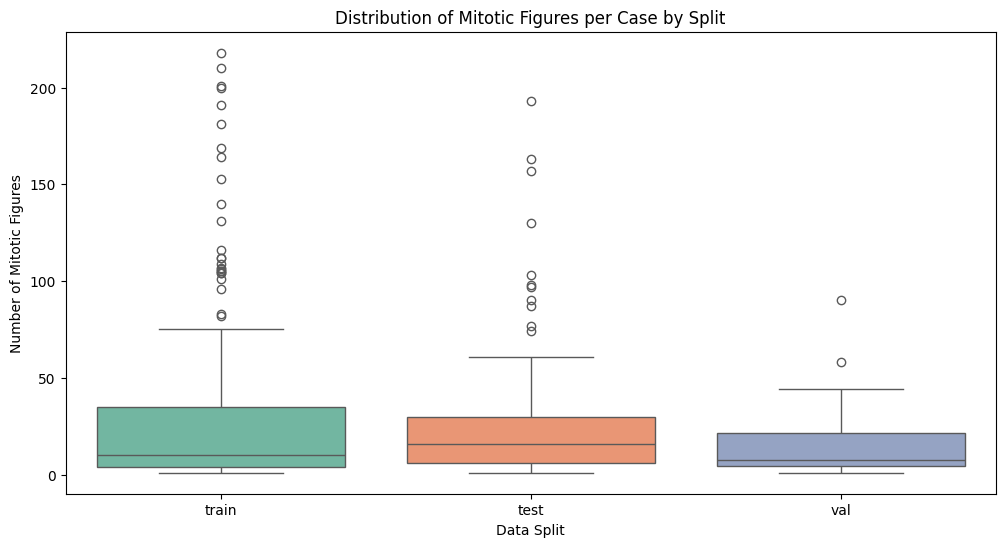

In [18]:
plot_mitotic_distribution(df)

In [23]:
folds = create_folds(dataset, num_folds=3)

In [24]:
len(folds)

3

/tmp/ipykernel_3183933/4065265800.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='split', y='mitotic_count', data=mitotic_counts, palette='Set2')


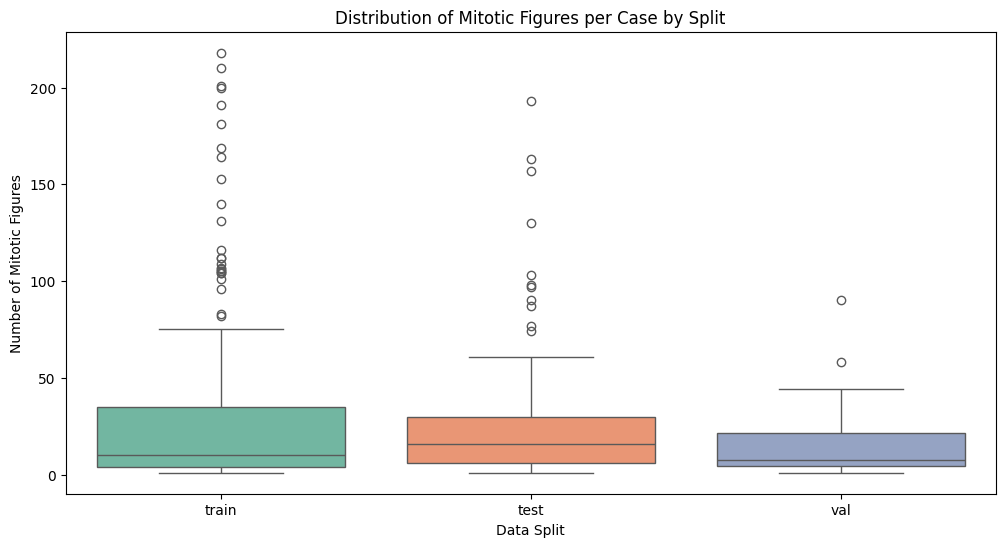

/tmp/ipykernel_3183933/4065265800.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='split', y='mitotic_count', data=mitotic_counts, palette='Set2')


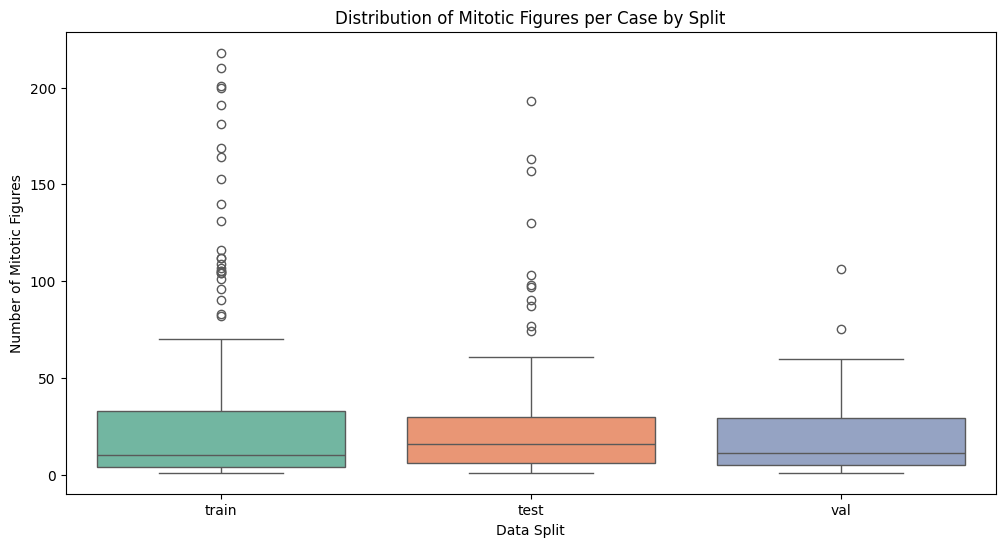

/tmp/ipykernel_3183933/4065265800.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='split', y='mitotic_count', data=mitotic_counts, palette='Set2')


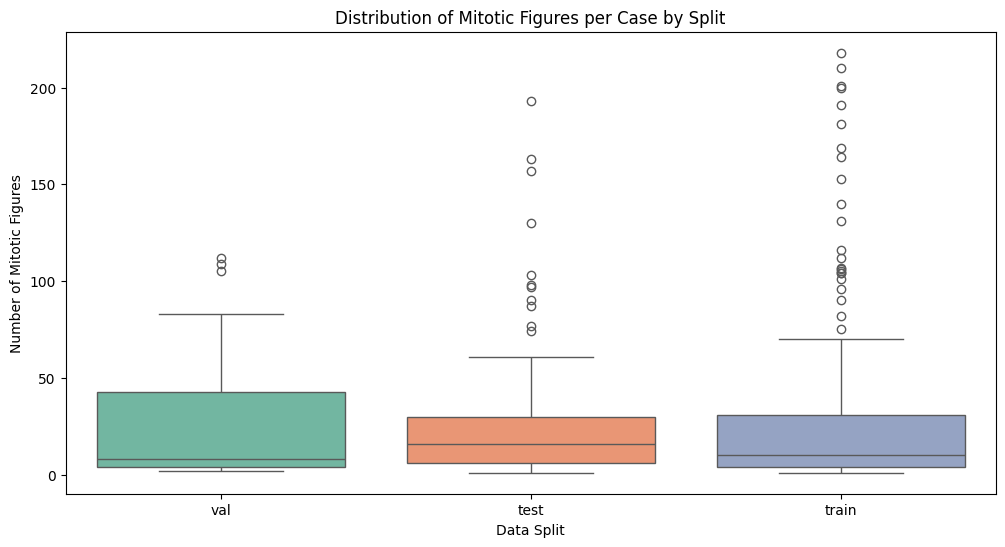

In [25]:
for k in range(3):

    fold = folds[k]


    plot_mitotic_distribution(fold)


    fold.to_csv(f'annotations/midog_2022_training_fold_{k}.csv', index=False)

In [26]:
folds[0].query('split == "val"').filename.unique()

array(['026.tiff', '039.tiff', '053.tiff', '056.tiff', '067.tiff',
       '070.tiff', '073.tiff', '076.tiff', '080.tiff', '088.tiff',
       '089.tiff', '091.tiff', '096.tiff', '109.tiff', '118.tiff',
       '135.tiff', '140.tiff', '146.tiff', '148.tiff', '159.tiff',
       '162.tiff', '177.tiff', '182.tiff', '184.tiff', '193.tiff',
       '207.tiff', '220.tiff', '226.tiff', '247.tiff', '252.tiff',
       '255.tiff', '294.tiff', '308.tiff', '310.tiff', '327.tiff',
       '337.tiff'], dtype=object)

In [27]:
folds[1].query('split == "val"').filename.unique()

array(['007.tiff', '008.tiff', '010.tiff', '016.tiff', '024.tiff',
       '031.tiff', '032.tiff', '039.tiff', '059.tiff', '081.tiff',
       '091.tiff', '124.tiff', '136.tiff', '142.tiff', '150.tiff',
       '166.tiff', '187.tiff', '188.tiff', '190.tiff', '201.tiff',
       '234.tiff', '244.tiff', '245.tiff', '263.tiff', '271.tiff',
       '277.tiff', '283.tiff', '293.tiff', '299.tiff', '305.tiff',
       '312.tiff', '314.tiff', '317.tiff', '321.tiff', '328.tiff',
       '345.tiff'], dtype=object)

In [28]:
folds[2].query('split == "val"').filename.unique()

array(['002.tiff', '037.tiff', '038.tiff', '047.tiff', '056.tiff',
       '063.tiff', '076.tiff', '104.tiff', '125.tiff', '145.tiff',
       '154.tiff', '165.tiff', '193.tiff', '197.tiff', '199.tiff',
       '201.tiff', '203.tiff', '213.tiff', '216.tiff', '230.tiff',
       '243.tiff', '263.tiff', '266.tiff', '271.tiff', '273.tiff',
       '276.tiff', '284.tiff', '294.tiff', '298.tiff', '299.tiff',
       '310.tiff', '323.tiff', '328.tiff', '330.tiff', '336.tiff',
       '352.tiff'], dtype=object)

In [29]:
folds[2].query('split == "test"').filename.unique()

array(['003.tiff', '013.tiff', '027.tiff', '028.tiff', '029.tiff',
       '030.tiff', '036.tiff', '044.tiff', '045.tiff', '062.tiff',
       '066.tiff', '071.tiff', '075.tiff', '077.tiff', '084.tiff',
       '086.tiff', '092.tiff', '103.tiff', '105.tiff', '108.tiff',
       '116.tiff', '121.tiff', '128.tiff', '129.tiff', '130.tiff',
       '134.tiff', '139.tiff', '141.tiff', '143.tiff', '144.tiff',
       '152.tiff', '157.tiff', '158.tiff', '164.tiff', '167.tiff',
       '170.tiff', '178.tiff', '185.tiff', '186.tiff', '195.tiff',
       '202.tiff', '205.tiff', '211.tiff', '218.tiff', '227.tiff',
       '229.tiff', '238.tiff', '241.tiff', '246.tiff', '249.tiff',
       '257.tiff', '260.tiff', '264.tiff', '268.tiff', '270.tiff',
       '272.tiff', '278.tiff', '288.tiff', '291.tiff', '292.tiff',
       '302.tiff', '306.tiff', '307.tiff', '311.tiff', '313.tiff',
       '316.tiff', '319.tiff', '320.tiff', '332.tiff', '347.tiff',
       '354.tiff'], dtype=object)

In [30]:
folds[1].query('split == "test"').filename.unique()

array(['003.tiff', '013.tiff', '027.tiff', '028.tiff', '029.tiff',
       '030.tiff', '036.tiff', '044.tiff', '045.tiff', '062.tiff',
       '066.tiff', '071.tiff', '075.tiff', '077.tiff', '084.tiff',
       '086.tiff', '092.tiff', '103.tiff', '105.tiff', '108.tiff',
       '116.tiff', '121.tiff', '128.tiff', '129.tiff', '130.tiff',
       '134.tiff', '139.tiff', '141.tiff', '143.tiff', '144.tiff',
       '152.tiff', '157.tiff', '158.tiff', '164.tiff', '167.tiff',
       '170.tiff', '178.tiff', '185.tiff', '186.tiff', '195.tiff',
       '202.tiff', '205.tiff', '211.tiff', '218.tiff', '227.tiff',
       '229.tiff', '238.tiff', '241.tiff', '246.tiff', '249.tiff',
       '257.tiff', '260.tiff', '264.tiff', '268.tiff', '270.tiff',
       '272.tiff', '278.tiff', '288.tiff', '291.tiff', '292.tiff',
       '302.tiff', '306.tiff', '307.tiff', '311.tiff', '313.tiff',
       '316.tiff', '319.tiff', '320.tiff', '332.tiff', '347.tiff',
       '354.tiff'], dtype=object)

In [31]:
folds[0].query('split == "test"').filename.unique()

array(['003.tiff', '013.tiff', '027.tiff', '028.tiff', '029.tiff',
       '030.tiff', '036.tiff', '044.tiff', '045.tiff', '062.tiff',
       '066.tiff', '071.tiff', '075.tiff', '077.tiff', '084.tiff',
       '086.tiff', '092.tiff', '103.tiff', '105.tiff', '108.tiff',
       '116.tiff', '121.tiff', '128.tiff', '129.tiff', '130.tiff',
       '134.tiff', '139.tiff', '141.tiff', '143.tiff', '144.tiff',
       '152.tiff', '157.tiff', '158.tiff', '164.tiff', '167.tiff',
       '170.tiff', '178.tiff', '185.tiff', '186.tiff', '195.tiff',
       '202.tiff', '205.tiff', '211.tiff', '218.tiff', '227.tiff',
       '229.tiff', '238.tiff', '241.tiff', '246.tiff', '249.tiff',
       '257.tiff', '260.tiff', '264.tiff', '268.tiff', '270.tiff',
       '272.tiff', '278.tiff', '288.tiff', '291.tiff', '292.tiff',
       '302.tiff', '306.tiff', '307.tiff', '311.tiff', '313.tiff',
       '316.tiff', '319.tiff', '320.tiff', '332.tiff', '347.tiff',
       '354.tiff'], dtype=object)

3

In [32]:
fold_data = []
for fold in range(3):
    fold_df = folds[fold][['filename', 'split']].drop_duplicates()
    fold_df = fold_df.rename(columns={'split': f'fold_{fold + 1}'})
    fold_data.append(fold_df)

# Merge the dataframes on the filename
combined_df = fold_data[0]
for fold_df in fold_data[1:]:
    combined_df = pd.merge(combined_df, fold_df, on='filename', how='outer')

In [33]:
combined_df

,filename,fold_1,fold_2,fold_3
0,001.tiff,train,train,train
1,002.tiff,train,train,val
2,003.tiff,test,test,test
3,004.tiff,train,train,train
4,005.tiff,train,train,train
...,...,...,...,...
349,350.tiff,train,train,train
350,351.tiff,train,train,train
351,352.tiff,train,train,val
352,353.tiff,train,train,train


In [34]:
combined_df.to_csv('annotations/folds_overview.csv', index=False)

### Make subtyping datasets

In [5]:
subtyping_data = pd.read_csv('annotations/MIDOG2022_training_subtyping.csv')
folds_data = pd.read_csv('annotations/folds_overview.csv')

In [22]:
folds = []

for idx, fold in enumerate(['fold_1', 'fold_2', 'fold_3']):
    fold_copy = subtyping_data.copy()
    fold_copy = fold_copy.merge(folds_data[['filename', fold]], on='filename')
    fold_copy = fold_copy.drop('split', axis=1)
    fold_copy = fold_copy.rename({fold: 'split'}, axis=1)
    fold_copy.to_csv(f'annotations/midog_2022_training_subtyping_fold_{idx}.csv', index=False)

In [23]:
fold_copy.head()

,x,y,filename,tumortype,label,slide,split
0,4421.0,218.0,002.tiff,human breast cancer,2,NaN,val
1,1313.0,2784.5,002.tiff,human breast cancer,3,NaN,val
2,3534.5,2489.0,002.tiff,human breast cancer,2,NaN,val
3,2190.5,3262.5,002.tiff,human breast cancer,2,NaN,val
4,5342.0,3267.5,002.tiff,human breast cancer,2,NaN,val
